In [1]:
!pip install brewer2mpl

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('once')

In [3]:
large = 22
med = 16
small = 12

params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
%matplotlib inline

print(mpl.__version__)
print(sns.__version__)

3.7.1
0.13.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-3-cda313dfeac0>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

In [5]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(332, 29)

In [6]:
df.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-a3d7e8500c5b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter('area', 'poptotal', data = df.loc[df.category == category, :],


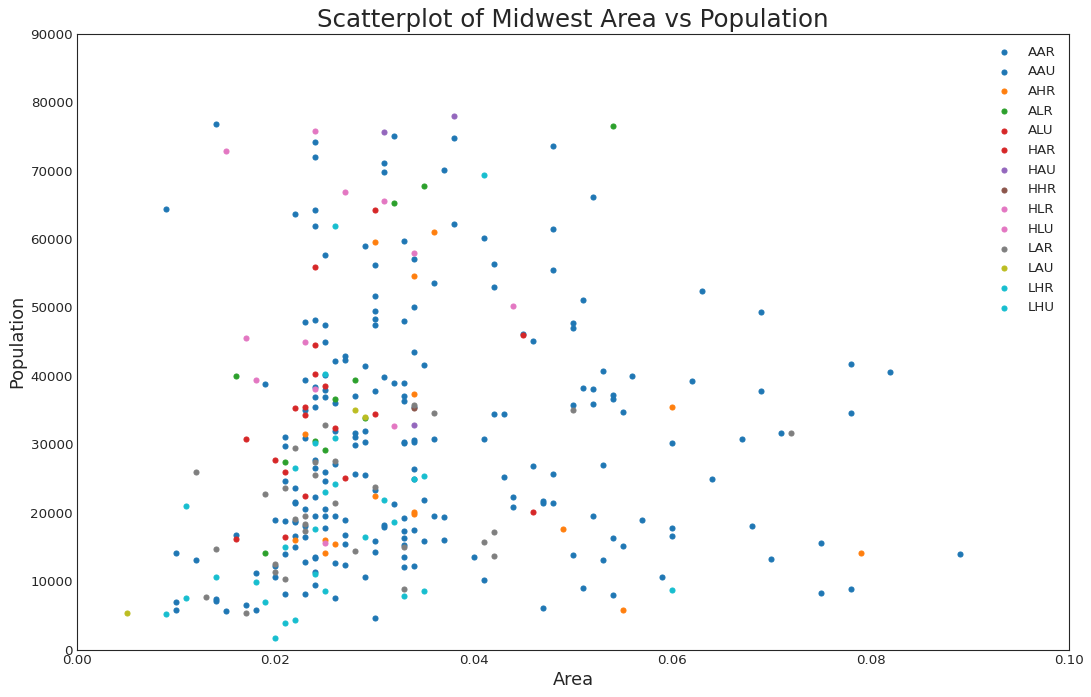

In [7]:
#지역과 인구에 대한 비교
categories = np.unique(df['category'])
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]#위에 카테고리에 대한 색을 할당하는 작업
#category가 너무 많으면 plot이 직관적이지 않아서 해석이 어려움

plt.figure(figsize = (16, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')#기본 figure 설정

#figure에 category별 scatter plot을 그리기(하나에 figure에 다 그리기)
for i, category in enumerate(categories):
  plt.scatter('area', 'poptotal', data = df.loc[df.category == category, :],
              s = 20, c = colors[i], label = str(category))

#Decorations
plt.gca().set(xlim = (0.0, 0.1), ylim = (0, 90000),
              xlabel = 'Area', ylabel = 'Population')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Scatterplot of Midwest Area vs Population', fontsize = 22)
plt.legend(fontsize = 12)
plt.show()

In [8]:
from matplotlib import patches
from scipy.spatial import ConvexHull#특정 area를 표현하기 위해 import
import warnings
warnings.simplefilter('ignore')
sns.set_style('white')

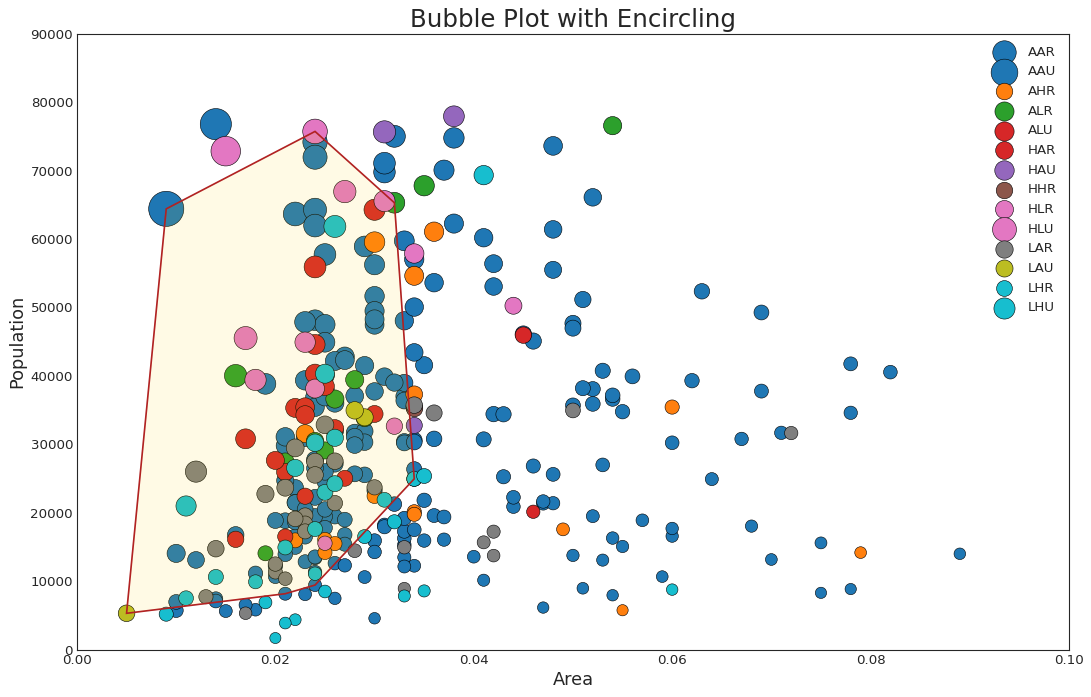

In [9]:
#scatterplot 또다른 방법
categories = np.unique(df['category'])
colors = [plt.cm.tab10(i/float(len(categories) - 1)) for i in range(len(categories))]

plt.figure(figsize = (16, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')#기본 figure 설정

#figure에 category별 scatter plot을 그리기(하나에 figure에 다 그리기)
for i, category in enumerate(categories):
  plt.scatter('area', 'poptotal', data = df.loc[df.category == category, :],
              s = 'dot_size', c = colors[i], label = str(category), edgecolors = 'black', linewidths = .5)


#참고:https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-dta-in-scatter-plot
def encircle(x, y, ax = None, **kw):
  if not ax: ax=plt.gca()
  p = np.c_[x, y]
  hull = ConvexHull(p)
  poly = plt.Polygon(p[hull.vertices, :], **kw)
  ax.add_patch(poly)

df_encircle_data = df.loc[df.state == 'IN', :]

encircle(df_encircle_data.area, df_encircle_data.poptotal, ec = 'k', fc = 'gold', alpha = 0.1)#내부면적 설정 fc = gold == 내부면적 황금색
encircle(df_encircle_data.area, df_encircle_data.poptotal, ec = 'firebrick', fc = 'none', linewidth = 1.5)#테두리 설정 fc = none == 내부면적 색없음, ec = 'firebrick'테두리색 빨강

plt.gca().set(xlim = (0.0, 0.1), ylim = (0, 90000),
              xlabel = 'Area', ylabel = 'Population')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Bubble Plot with Encircling', fontsize = 22)
plt.legend(fontsize = 12)
plt.show()

In [10]:
#Scatter plot with linear regression line of besst fit
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')

In [11]:
df_select = df.loc[df.cyl.isin([4, 8]), :]

In [12]:
df_select.shape

(151, 11)

In [13]:
df_select

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize


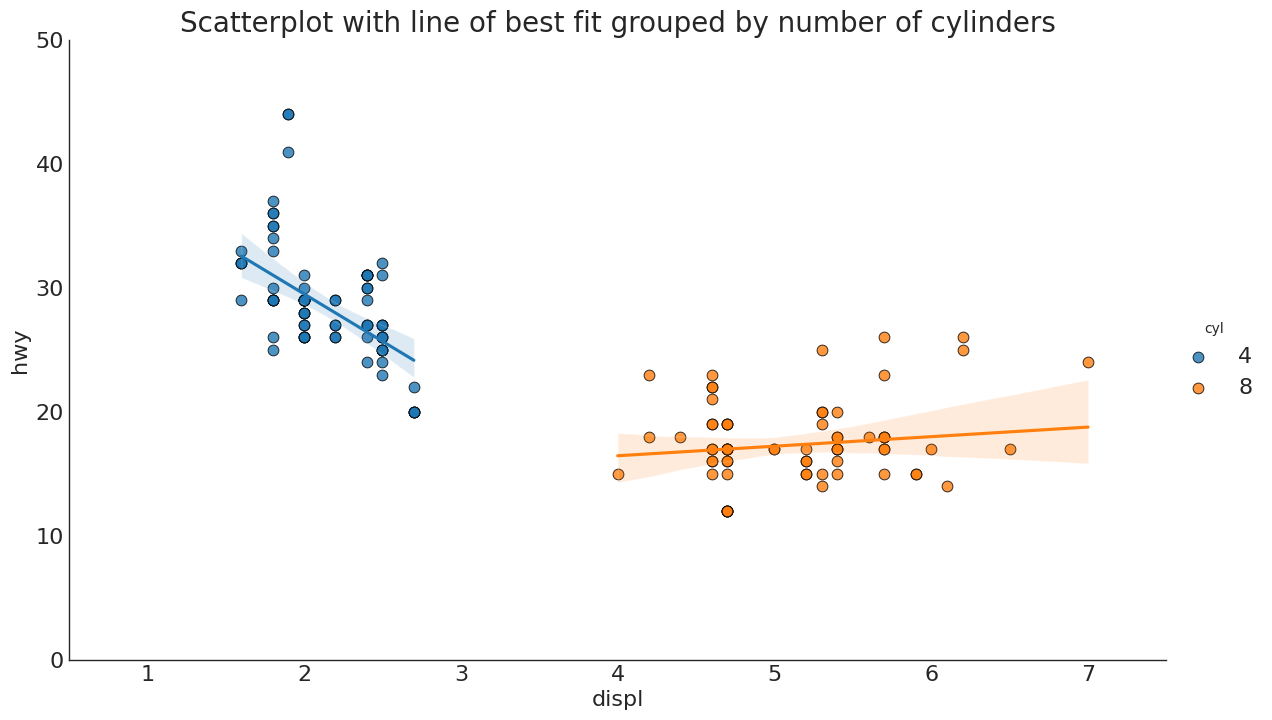

In [14]:
gridobj = sns.lmplot(x = 'displ', y = 'hwy', hue = 'cyl', data = df_select,  #displ: 배기량, hwy: 고속도로연비, cyl: 기통
                     height = 7, aspect = 1.7, robust = True, palette = 'tab10',
                     scatter_kws = dict(s = 60, linewidths = .7, edgecolors = 'black'))

gridobj.set(xlim = (0.5, 7.5), ylim = (0, 50))
plt.title('Scatterplot with line of best fit grouped by number of cylinders', fontsize = 20)
plt.show()

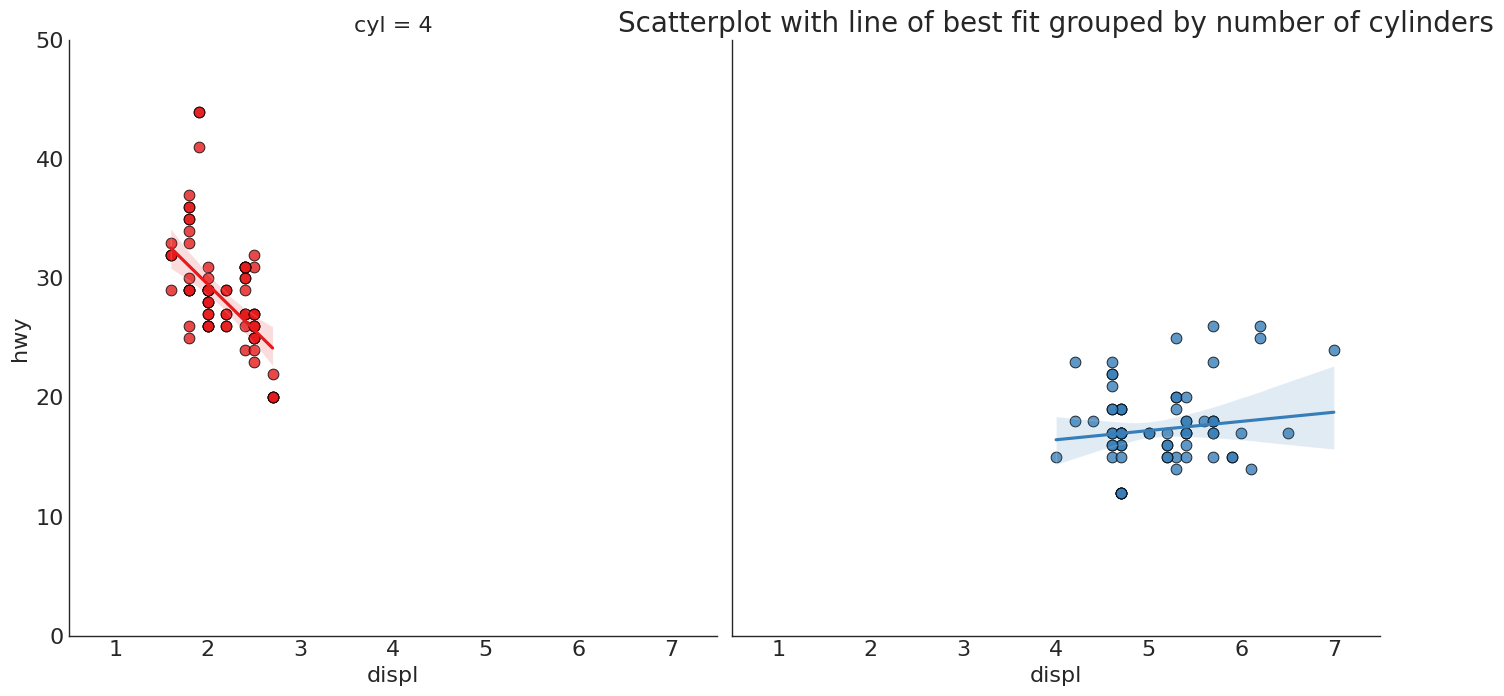

In [15]:
#cyl을 분리해서 그리기

gridobj = sns.lmplot(x = 'displ', y = 'hwy', hue = 'cyl', #displ: 배기량, hwy: 고속도로연비, cyl: 기통
                     data = df_select,
                     height = 7,
                     robust = True,
                     palette = 'Set1',
                     col = 'cyl',#cyl 종류별로 그리기
                     scatter_kws = dict(s = 60, linewidths = .7, edgecolors = 'black'))

gridobj.set(xlim = (0.5, 7.5), ylim = (0, 50))
plt.title('Scatterplot with line of best fit grouped by number of cylinders', fontsize = 20)
plt.show()

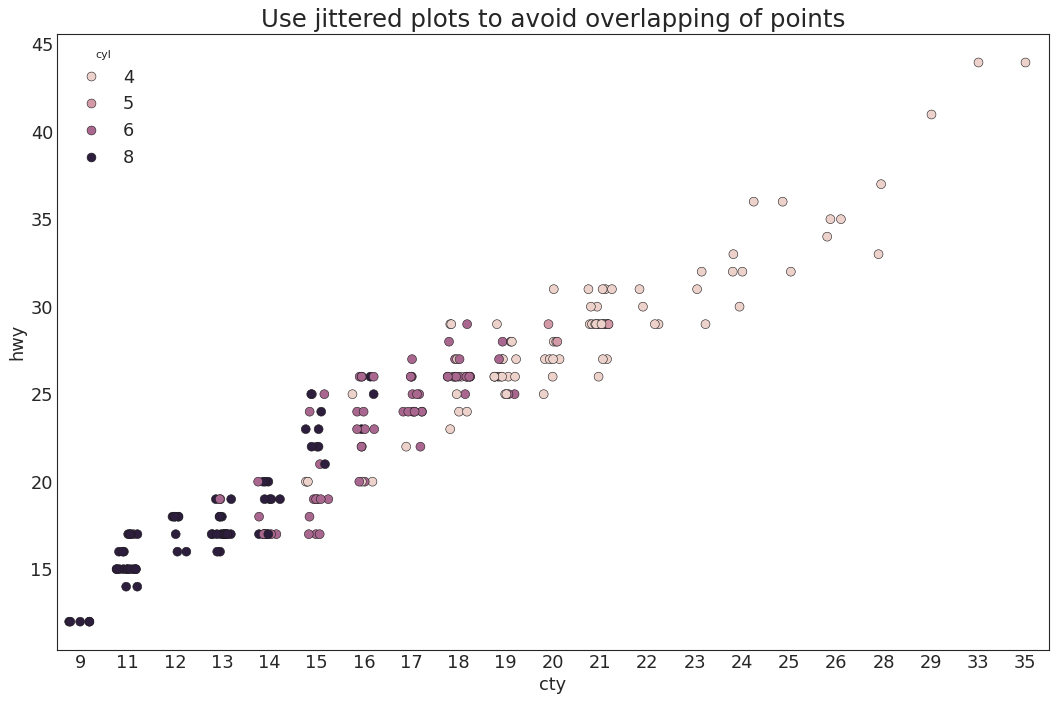

In [16]:
#Jittering with stripplot

fig, ax = plt.subplots(figsize = (16, 10), dpi = 80)
sns.stripplot(x = df.cty, y = df.hwy, jitter = 0.25, size = 8, linewidth = .5, hue = df.cyl) #cty:도시연비, hwy: 고속도로 연비

plt.title('Use jittered plots to avoid overlapping of points', fontsize = 22)
plt.show()

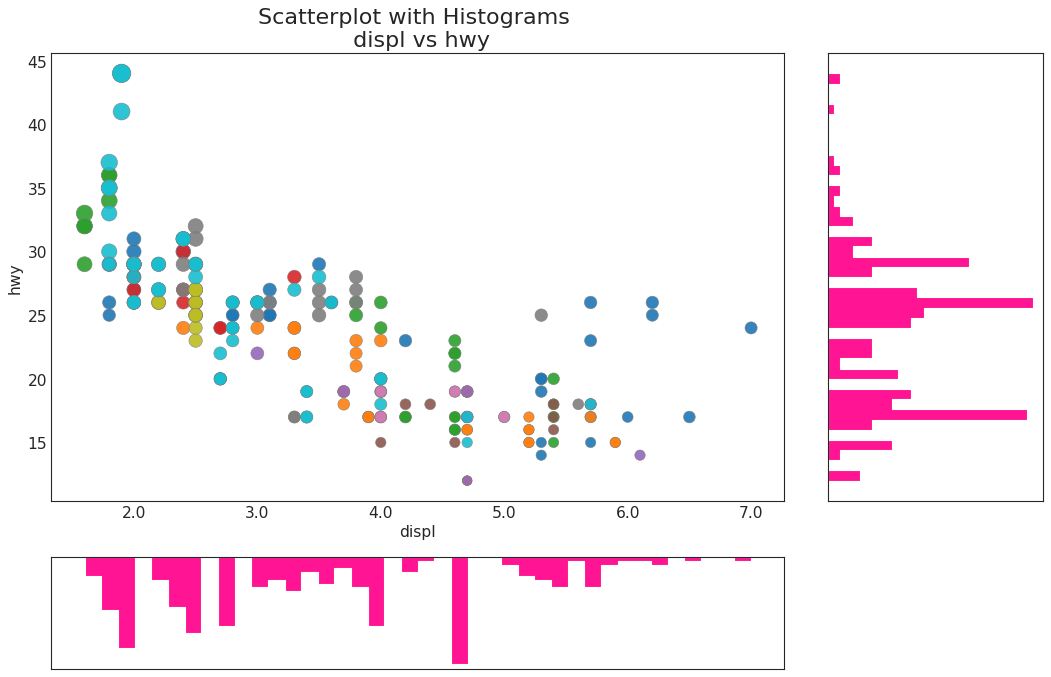

In [17]:
fig = plt.figure(figsize = (16, 10), dpi = 80)
grid = plt.GridSpec(4, 4, hspace = 0.5, wspace = 0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels = [], yticklabels = [])

ax_main.scatter('displ', 'hwy', s = df.cty * 8, c = df.manufacturer.astype('category').cat.codes, alpha = .9, data = df, cmap = 'tab10', edgecolors = 'gray', linewidths = .5)
#displ:배기량, hwy:고속도로연비, cty:도시연비

ax_bottom.hist(df.displ, 40, histtype = 'stepfilled', orientation = 'vertical', color = 'deeppink')
ax_bottom.invert_yaxis()

ax_right.hist(df.hwy, 40, histtype = 'stepfilled', orientation = 'horizontal', color = 'deeppink')

ax_main.set(title = 'Scatterplot with Histograms \n displ vs hwy', xlabel = 'displ', ylabel = 'hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
  item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

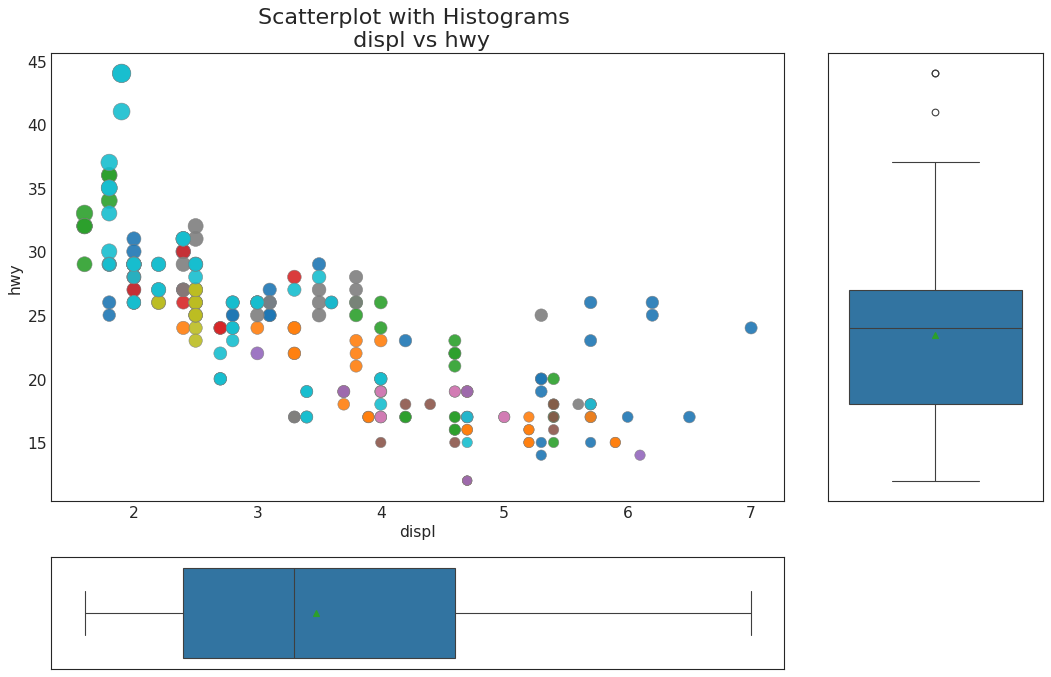

In [18]:
fig = plt.figure(figsize = (16, 10), dpi = 80)
grid = plt.GridSpec(4, 4, hspace = 0.5, wspace = 0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels = [], yticklabels = [])

ax_main.scatter('displ', 'hwy', s = df.cty * 8, c = df.manufacturer.astype('category').cat.codes, alpha = .9, data = df, cmap = 'tab10', edgecolors = 'gray', linewidths = .5)
#displ:배기량, hwy:고속도로연비, cty:도시연비

sns.boxplot(df.hwy, ax = ax_right, orient = 'v', showmeans = True)
sns.boxplot(df.displ, ax = ax_bottom, orient = 'h',showmeans = True)

ax_right.set(ylabel = '')
ax_bottom.set(xlabel = '')


ax_main.set(title = 'Scatterplot with Histograms \n displ vs hwy', xlabel = 'displ', ylabel = 'hwy')

ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
  item.set_fontsize(14)

plt.show()

#Correlation

In [19]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


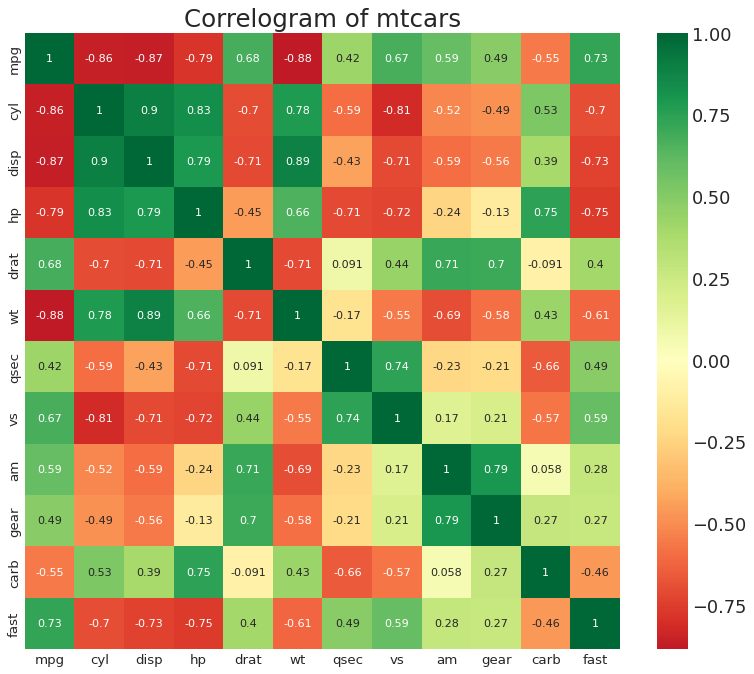

In [20]:
#seaborn heatmap
#변수가 너무 많으면 corr()시간이 매우 오래걸림
plt.figure(figsize = (12, 10), dpi = 80)
sns.heatmap(df.corr(numeric_only=True), xticklabels = df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap = 'RdYlGn', center = 0, annot = True)

plt.title('Correlogram of mtcars', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [21]:
df = sns.load_dataset('iris')

<Figure size 800x640 with 0 Axes>

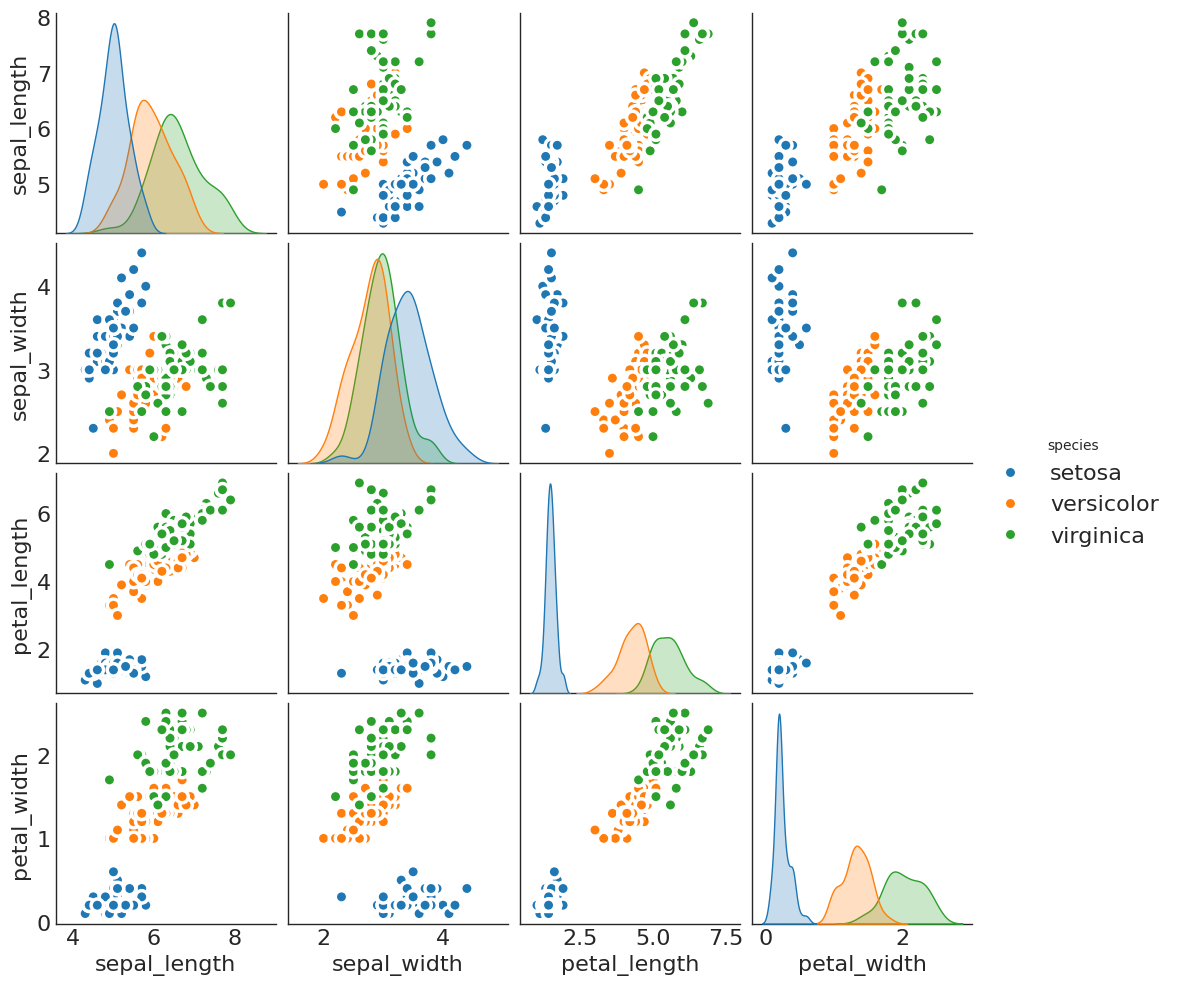

In [22]:
#Pairwise Plot
plt.figure(figsize = (10, 8), dpi = 80)
sns.pairplot(df, kind = 'scatter', hue = 'species', plot_kws = dict(s = 80, edgecolor = 'white', linewidth = 2.5))
plt.show()

#Deviation

In [23]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')

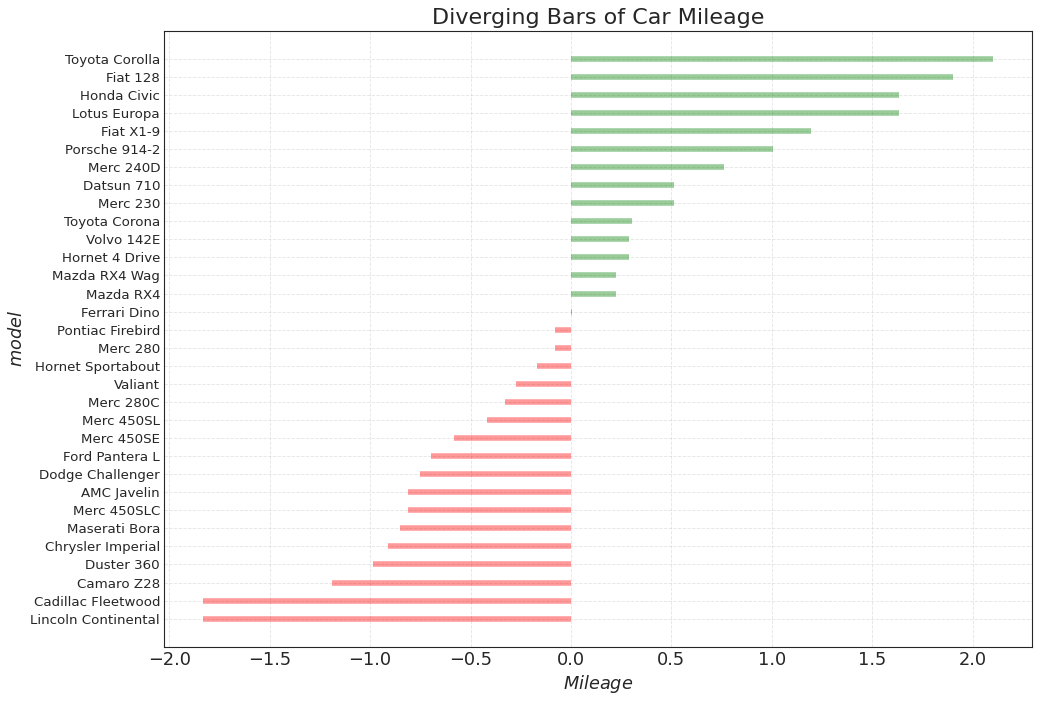

In [24]:
#Diverging Bars
#ordering 하여 bar형태로 표현
x = df.loc[:, ['mpg']] #mpg:연비
df['mpg_z'] = (x - x.mean()) / x.std()#normalize
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace = True)
df.reset_index(inplace = True)


plt.figure(figsize = (14, 10), dpi = 80)
plt.hlines(y = df.index, xmin = 0, xmax = df.mpg_z, color = df.colors, alpha = 0.4, linewidth = 5)

plt.gca().set(ylabel = '$model$', xlabel = '$Mileage$')
plt.yticks(df.index, df.cars, fontsize = 12)
plt.title('Diverging Bars of Car Mileage', fontdict = {'size': 20})
plt.grid(linestyle = '--', alpha = 0.5)
plt.show()

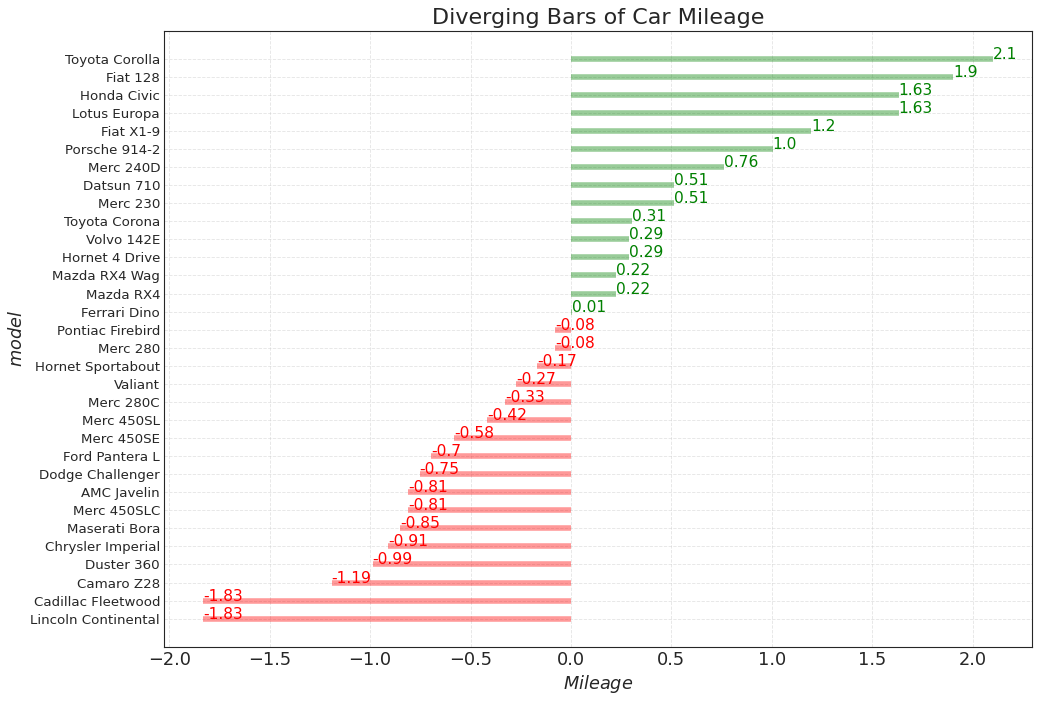

In [25]:
#Diverging Bars2
#ordering 하여 bar형태로 표현
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')
x = df.loc[:, ['mpg']] #mpg:연비
df['mpg_z'] = (x - x.mean()) / x.std()#normalize
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace = True)
df.reset_index(inplace = True)


plt.figure(figsize = (14, 10), dpi = 80)
plt.hlines(y = df.index, xmin = 0, xmax = df.mpg_z, color = df.colors, alpha = 0.4, linewidth = 5)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
  t = plt.text(x, y, round(tex, 2),  fontdict = {'color': 'red' if x < 0 else 'green', 'size': 14})

plt.gca().set(ylabel = '$model$', xlabel = '$Mileage$')
plt.yticks(df.index, df.cars, fontsize = 12)
plt.title('Diverging Bars of Car Mileage', fontdict = {'size': 20})
plt.grid(linestyle = '--', alpha = 0.5)
plt.show()

In [26]:
#Area Chart
#특정값을 기준으로 색을 다르게 표현
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/economics.csv', parse_dates = ['date']).head(100)

In [27]:
df.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


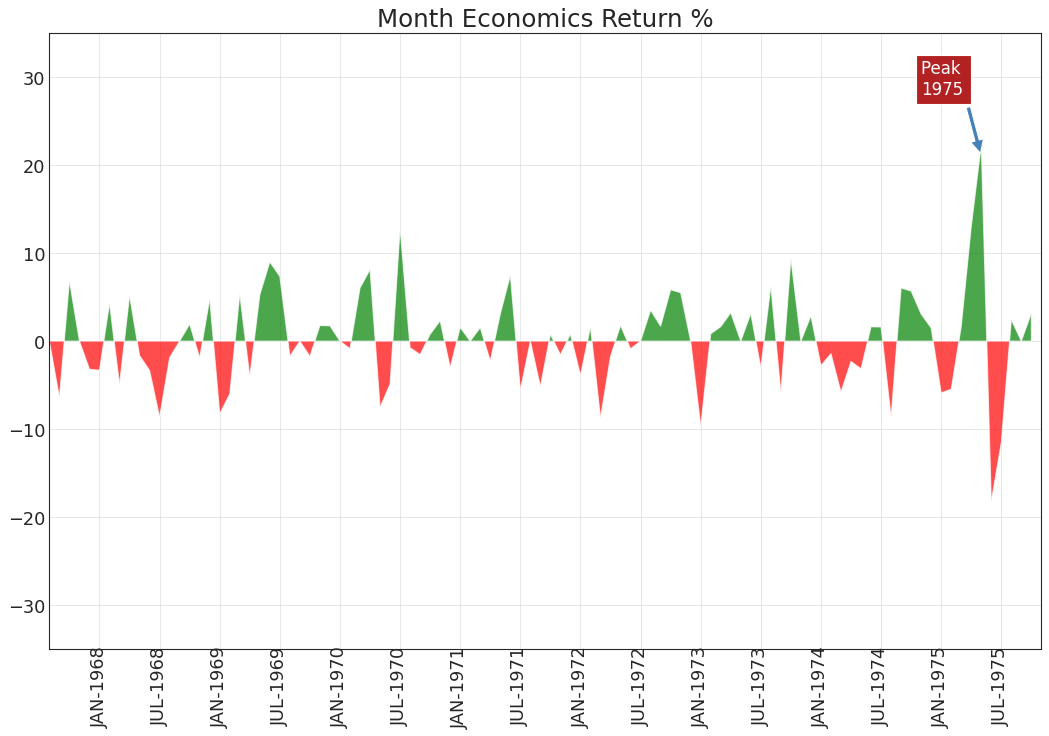

In [28]:
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0) / df.psavert.shift(1)).fillna(0) *100

plt.figure(figsize = (16, 10), dpi = 80)
plt.fill_between(x[1:], y_returns[1:], 0, where = y_returns[1:] >= 0, facecolor = 'green', interpolate = True, alpha = 0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where = y_returns[1:] <= 0, facecolor = 'red', interpolate = True, alpha = 0.7)

plt.annotate('Peak \n1975', xy = (94.0, 21.0), xytext = (88.0, 28),
             bbox = dict(boxstyle = 'square', fc = 'firebrick'),
             arrowprops = dict(facecolor = 'steelblue', shrink = 0.05), fontsize = 15, color = 'white')

xtickvals = [str(m)[:3].upper()+'-'+str(y) for y, m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation = 90, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35, 35)
plt.xlim(1, 100)
plt.title('Month Economics Return %', fontsize = 22)
plt.grid(alpha = 0.5)
plt.show()

#Ranking

In [29]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')
df = df[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace = True)
df.reset_index(inplace = True)

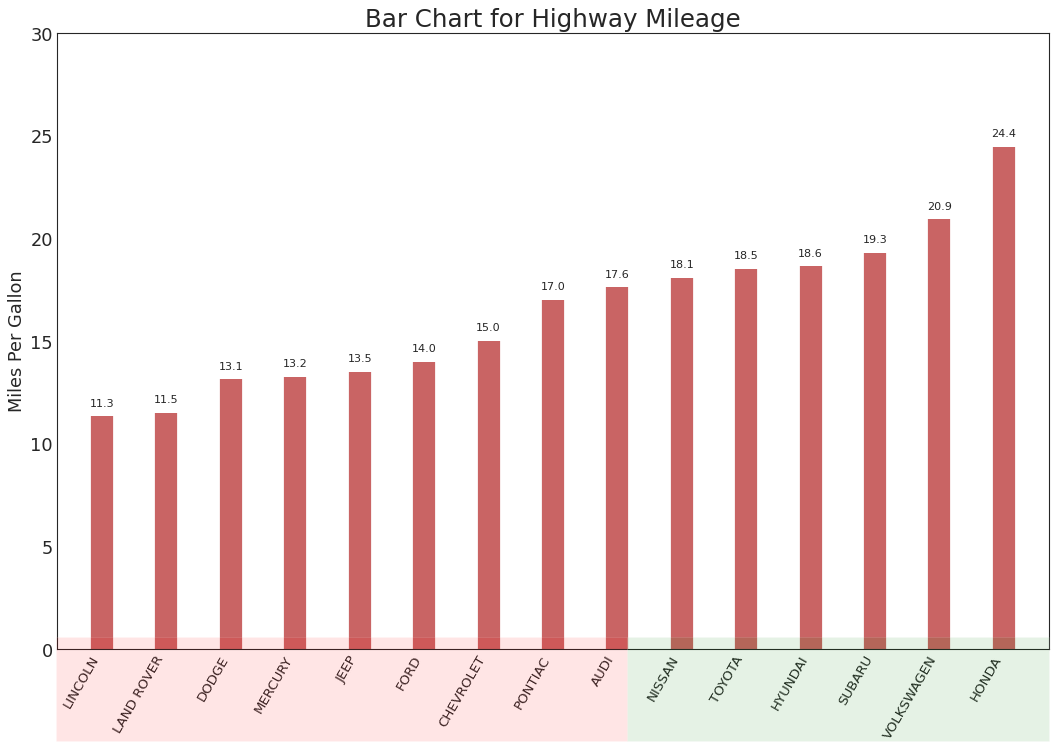

In [30]:
#Bar Chart를 이용하여 각 제조사들의 도시연비 Ranking을 표현
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize = (16, 10), facecolor = 'white', dpi = 80)
ax.vlines(x = df.index, ymin = 0, ymax = df.cty, color = 'firebrick', alpha = 0.7, linewidth = 20)

for i, cty in enumerate(df.cty):#cty:도시연비
  ax.text(i, cty+ + 0.5, round(cty, 1), horizontalalignment = 'center')

ax.set_title('Bar Chart for Highway Mileage', fontdict = {'size': 22})
ax.set(ylabel = 'Miles Per Gallon', ylim = (0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation = 60, horizontalalignment = 'right', fontsize = 12)

p1 = patches.Rectangle((.57, -0.005), width = .33, height = .13, alpha = .1, facecolor = 'green', transform = fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width = .446, height = .13, alpha = .1, facecolor = 'red', transform = fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

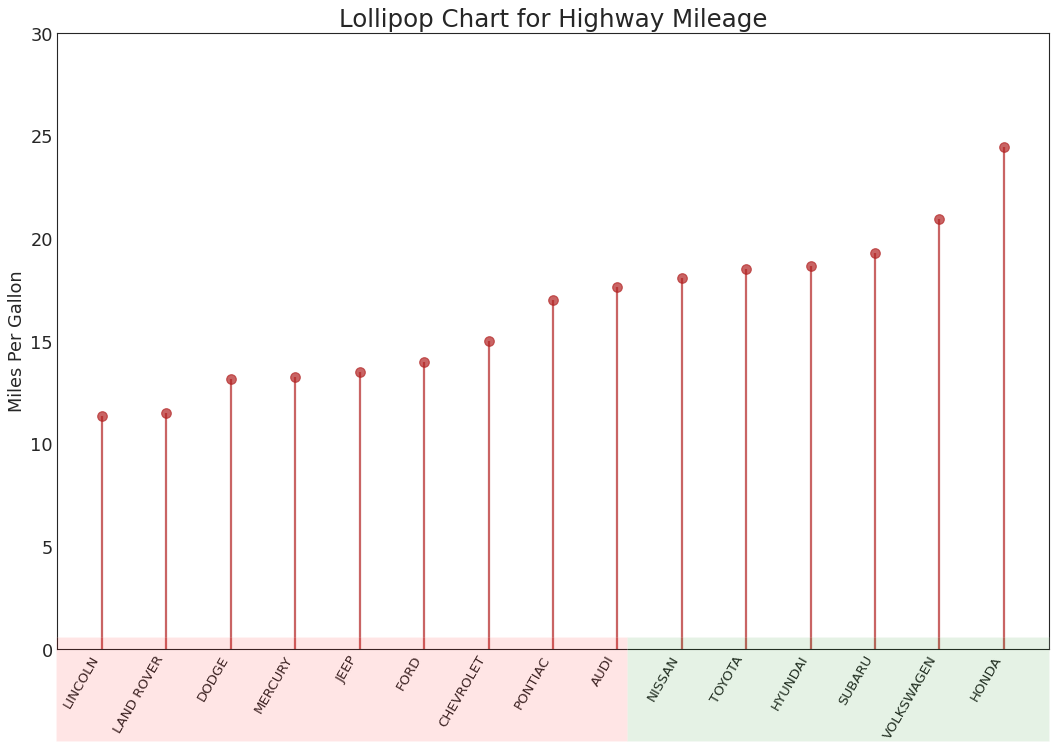

In [31]:
fig, ax = plt.subplots(figsize = (16, 10), facecolor = 'white', dpi = 80)
ax.vlines(x = df.index, ymin = 0, ymax = df.cty, color = 'firebrick', alpha = 0.7, linewidth = 2)
ax.scatter(x = df.index, y = df.cty, s = 75, color = 'firebrick', alpha = 0.7)


ax.set_title('Lollipop Chart for Highway Mileage', fontdict = {'size': 22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation = 60, fontdict = {'horizontalalignment':'right', 'size':12})
ax.set_ylim(0, 30)

#for row in df.itertuples():
#  ax.text(row.index, row.cty+0.5, s = round(row.cty, 2), horizontalalignment = 'center', verticalalignment = 'bottom', fontsize = 14)

p1 = patches.Rectangle((.57, -0.005), width = .33, height = .13, alpha = .1, facecolor = 'green', transform = fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width = .446, height = .13, alpha = .1, facecolor = 'red', transform = fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

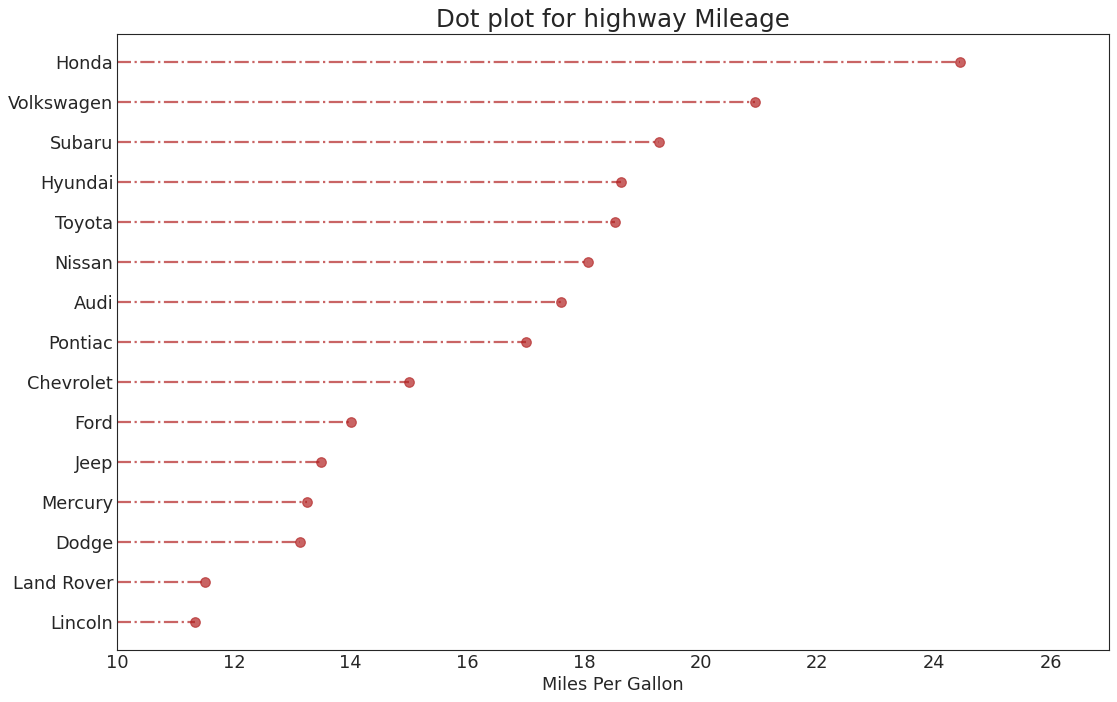

In [32]:
fig, ax = plt.subplots(figsize = (16, 10), facecolor = 'white', dpi = 80)
ax.hlines(y = df.index, xmin = 0, xmax = df.cty, color = 'firebrick', alpha = 0.7, linewidth = 2, linestyles = 'dashdot')
ax.scatter(y = df.index, x = df.cty, s = 75, color = 'firebrick', alpha = 0.7)


ax.set_title('Dot plot for highway Mileage', fontdict = {'size': 22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict = {'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

In [33]:
#Slope Chart
#기울기 그래프
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv')
df

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [34]:
import matplotlib.lines as mlines

left_label = [str(c) + ', ' + str(round(y)) for c, y, in zip(df.continent, df['1952'])]
right_label = [str(c) + ', ' + str(round(y)) for c, y, in zip(df.continent, df['1957'])]
klass = ['red'if (y1 - y2) < 0 else 'green' for y1, y2, in zip(df['1952'], df['1957'])]

In [35]:
#참고: https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color = 'black'):
  ax = plt.gca()
  l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color = 'red' if p1[1] - p2[1] > 0 else 'green', marker = 'o', markersize = 6)
  ax.add_line(l)
  return l

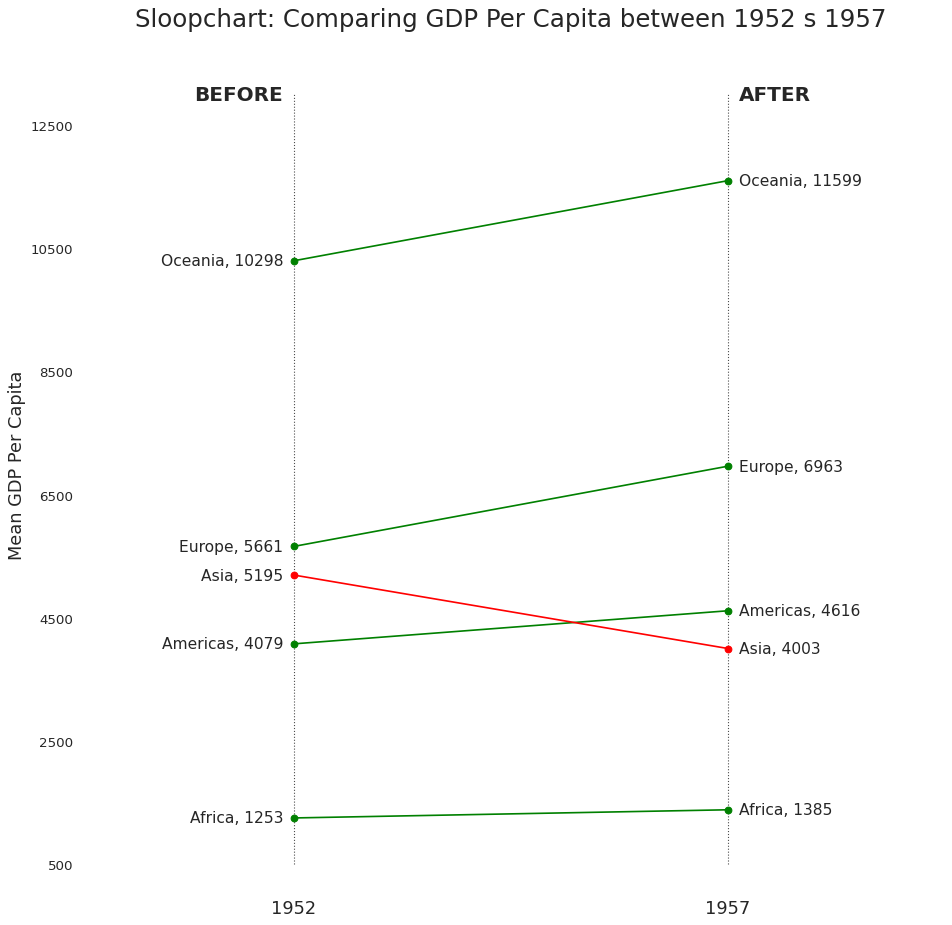

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (14, 14), dpi = 80)

ax.vlines(x = 1, ymin = 500, ymax = 13000, color = 'black', alpha = 0.7, linewidth = 1, linestyles = 'dotted')
ax.vlines(x = 3, ymin = 500, ymax = 13000, color = 'black', alpha = 0.7, linewidth = 1, linestyles = 'dotted')

ax.scatter(y = df['1952'], x = np.repeat(1, df.shape[0]), s = 10, color = 'black', alpha = 0.7)
ax.scatter(y = df['1957'], x = np.repeat(3, df.shape[0]), s = 10, color = 'black', alpha = 0.7)

for p1, p2, c, in zip(df['1952'], df['1957'], df['continent']):
  newline([1, p1], [3, p2])
  ax.text(1 - 0.05, p1, c + ', ' + str(round(p1)), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size': 14})
  ax.text(3 + 0.05, p2, c + ', ' + str(round(p2)), horizontalalignment = 'left', verticalalignment = 'center', fontdict = {'size': 14})

ax.text(1 - 0.05, 13000, 'BEFORE', horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size': 18, 'weight': 700})
ax.text(3 + 0.05, 13000, 'AFTER', horizontalalignment = 'left', verticalalignment = 'center', fontdict = {'size': 18, 'weight': 700})

ax.set_title('Sloopchart: Comparing GDP Per Capita between 1952 s 1957', fontdict = {'size': 22})
ax.set(xlim = (0, 4), ylim = (0, 14000), ylabel = 'Mean GDP Per Capita')
ax.set_xticks([1, 3])
ax.set_xticklabels(['1952', '1957'])
plt.yticks(np.arange(500, 13000, 2000), fontsize =12)

plt.gca().spines['top'].set_alpha(.0)
plt.gca().spines['bottom'].set_alpha(.0)
plt.gca().spines['right'].set_alpha(.0)
plt.gca().spines['left'].set_alpha(.0)
plt.show()

#Distribution

In [37]:
#Density Plot
#밀도를 나타내는 Plot

In [38]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')

In [39]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


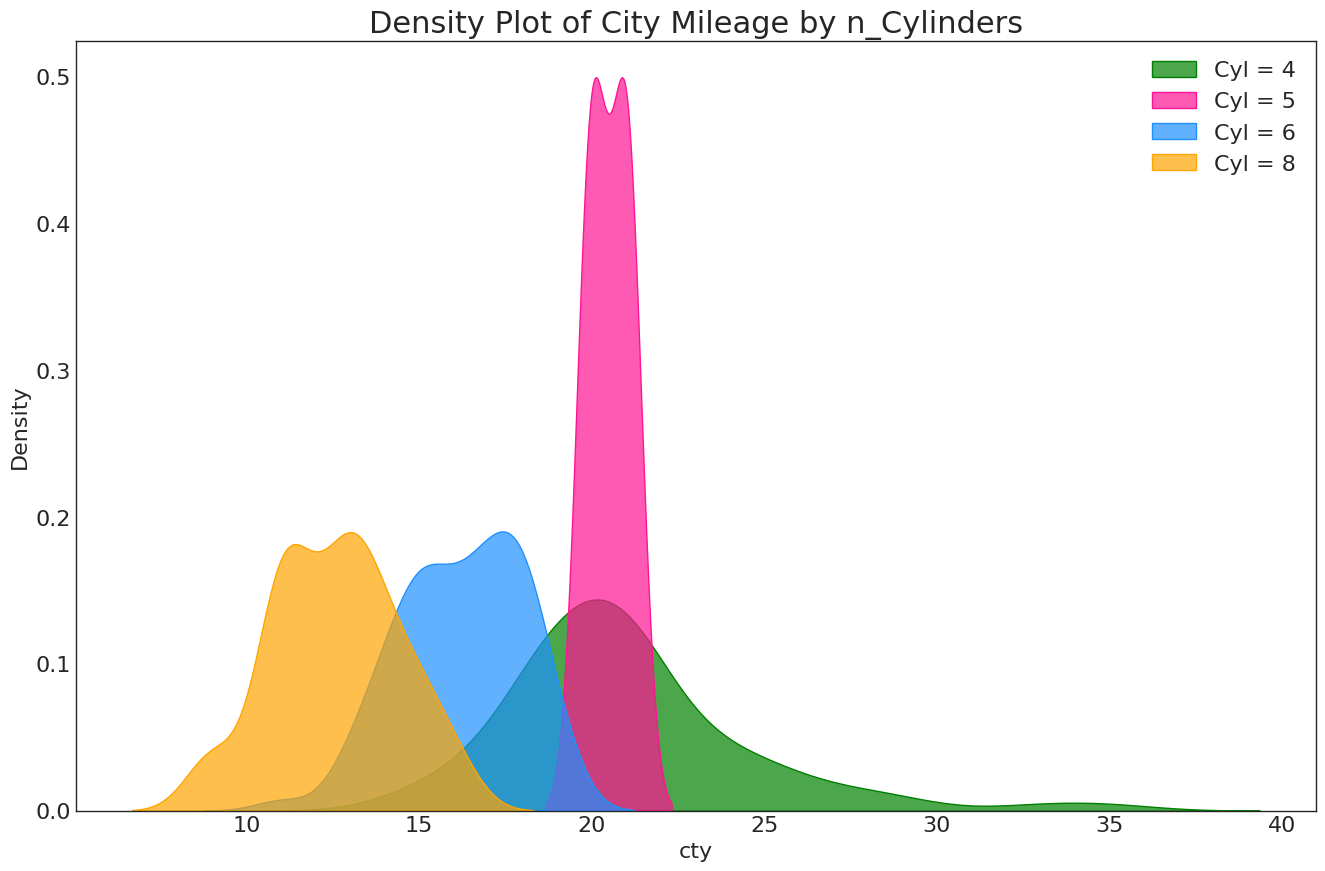

In [40]:
plt.figure(figsize = (16, 10), dpi = 100)
sns.kdeplot(df.loc[df['cyl'] == 4, 'cty'], shade = True, color = 'green', label = 'Cyl = 4', alpha = .7)
sns.kdeplot(df.loc[df['cyl'] == 5, 'cty'], shade = True, color = 'deeppink', label = 'Cyl = 5', alpha = .7)
sns.kdeplot(df.loc[df['cyl'] == 6, 'cty'], shade = True, color = 'dodgerblue', label = 'Cyl = 6', alpha = .7)
sns.kdeplot(df.loc[df['cyl'] == 8, 'cty'], shade = True, color = 'orange', label = 'Cyl = 8', alpha = .7)

plt.title('Density Plot of City Mileage by n_Cylinders', fontsize = 22)
plt.legend()
plt.show()

In [41]:
#Density Curves with Histogram
#Curve를 포함한 밀도함수
#너무 많은 종류를 그리면 해석하기 어려워짐

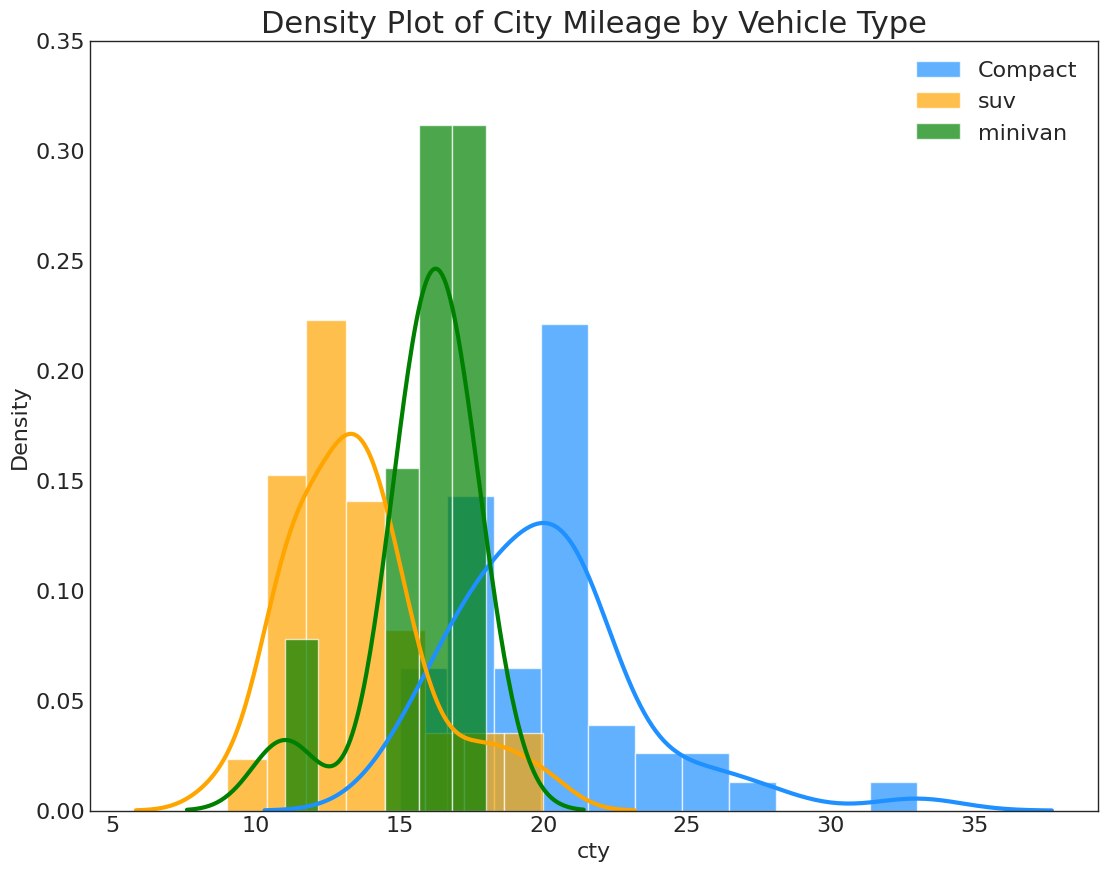

In [42]:
plt.figure(figsize = (13, 10), dpi = 100)
sns.distplot(df.loc[df['class'] == 'compact', 'cty'], color = 'dodgerblue', label = 'Compact', hist_kws = {'alpha': .7}, kde_kws = {'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', 'cty'], color = 'orange', label = 'suv', hist_kws = {'alpha': .7}, kde_kws = {'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', 'cty'], color = 'green', label = 'minivan', hist_kws = {'alpha': .7}, kde_kws = {'linewidth':3})
plt.ylim(0, 0.35)

plt.title('Density Plot of City Mileage by Vehicle Type', fontsize = 22)
plt.legend()
plt.show()

In [43]:
#Joy Plot
#각 Category에 따라 여러 변수에 대한 Distribtuion을 그려주는  Plot
!pip install joypy

<Figure size 1600x1000 with 0 Axes>

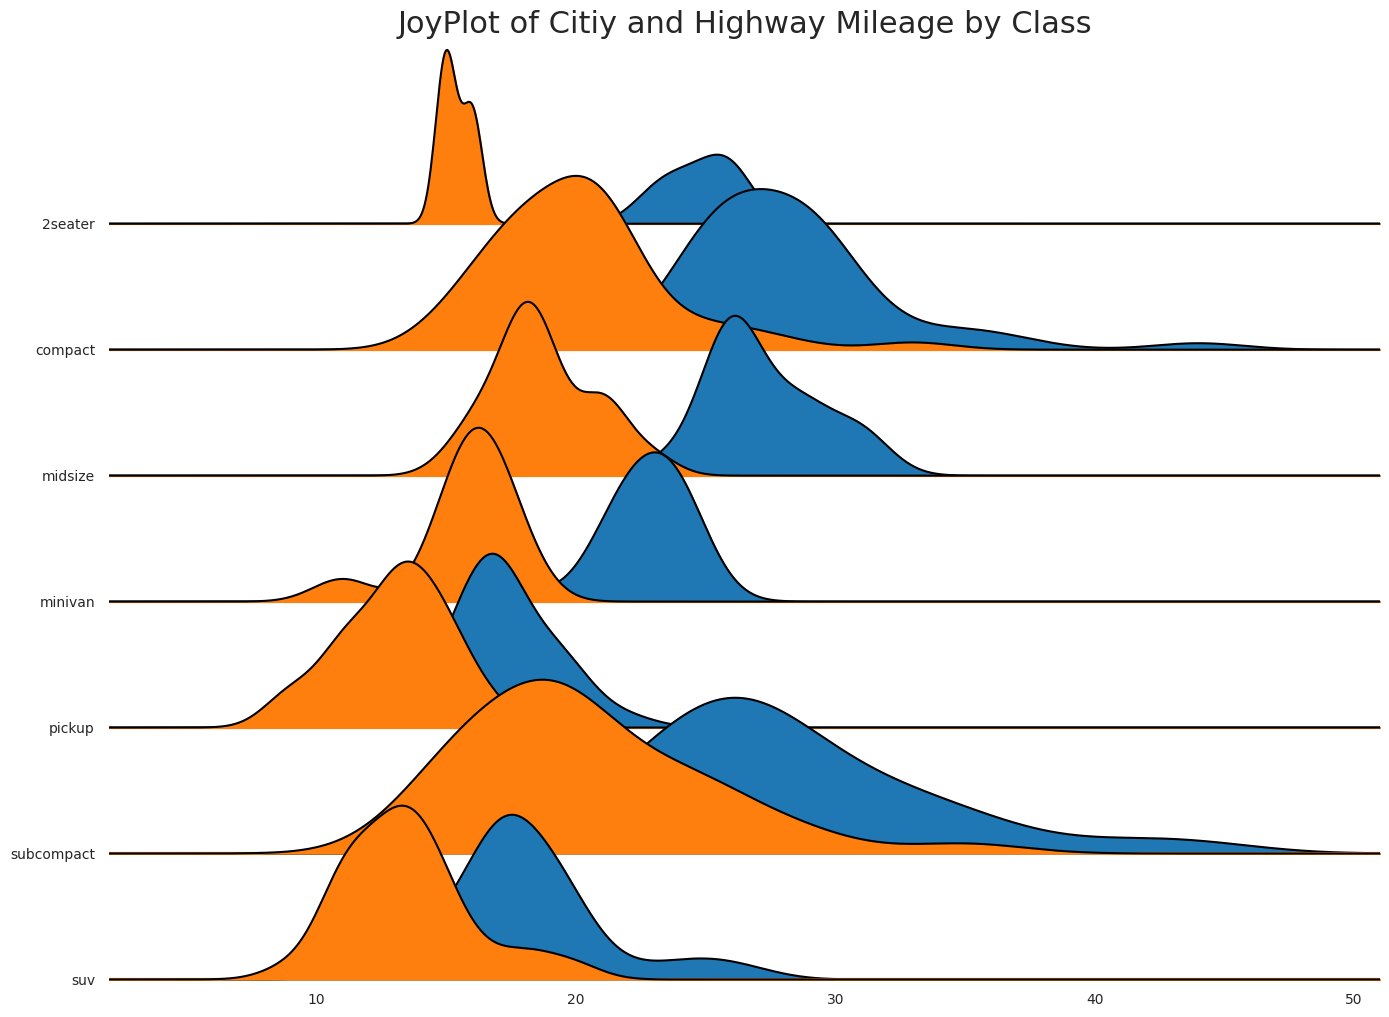

In [44]:
import joypy
plt.figure(figsize = (16, 10), dpi = 100)
fig, ax = joypy.joyplot(df, column = ['hwy', 'cty'], by = 'class', ylim = 'own', figsize = (14, 10))

plt.title('JoyPlot of Citiy and Highway Mileage by Class', fontsize = 22)
plt.show()

In [45]:
#Boxplot
#이상치를 찾는것이 쉬움

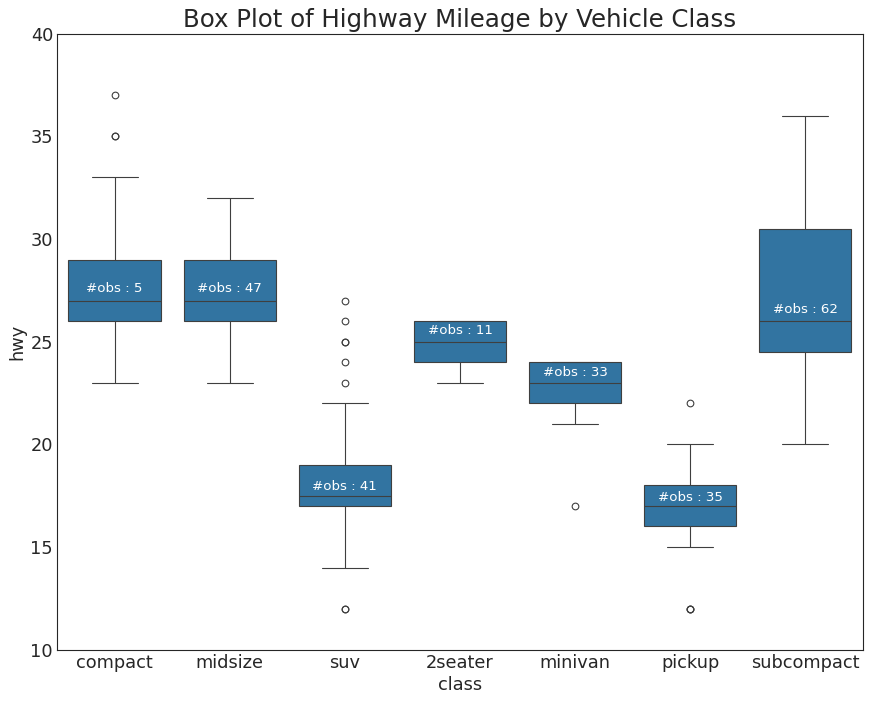

In [46]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.015, '#obs : '+str(n_ob), horizontalalignment='center', fontdict={'size':12}, color='white')

add_n_obs(df,group_col='class',y='hwy')

plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

In [47]:
#Violin Plot
#데이터가 많이 분포하면 그 부분은 면적이 커짐

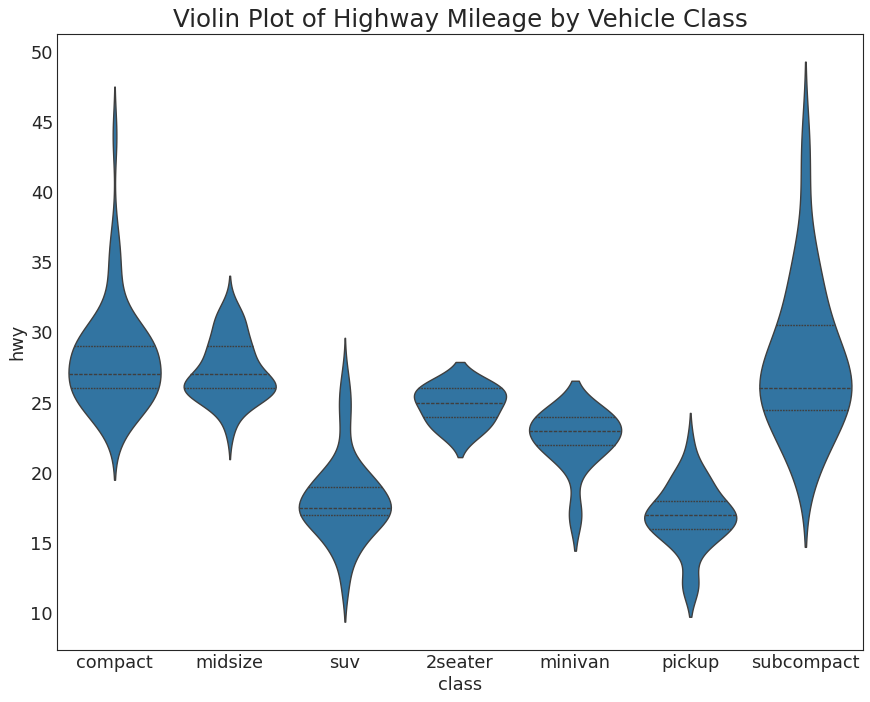

In [48]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

In [49]:
#Population Pytamid
#퍼낼 데이터를 이용한 피라미드 플랏

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv')
df.head()

,Stage,Gender,Users
0,Stage 01: Browsers,Male,-1.492762e+07
1,Stage 02: Unbounced Users,Male,-1.286266e+07
2,Stage 03: Email Signups,Male,-1.136190e+07
3,Stage 04: Email Confirmed,Male,-9.411708e+06
4,Stage 05: Campaign-Email Opens,Male,-8.074317e+06


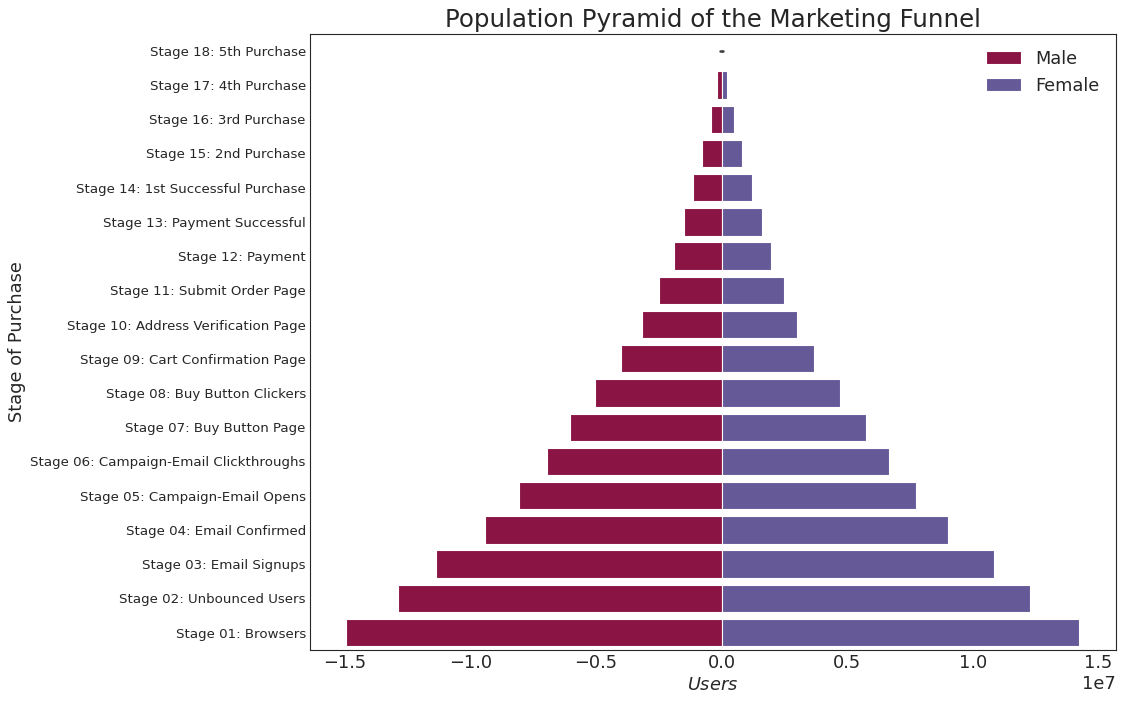

In [51]:
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)


plt.xlabel('$Users$')
plt.ylabel('Stage of Purchase')
plt.yticks(fontsize=12)
plt.title('Population Pyramid of the Marketing Funnel', fontsize=22)
plt.legend()
plt.show()

In [52]:
#Categorical Plots
#Category별 플랏

In [53]:
df = sns.load_dataset('titanic')
df = df[df.deck.notnull()]

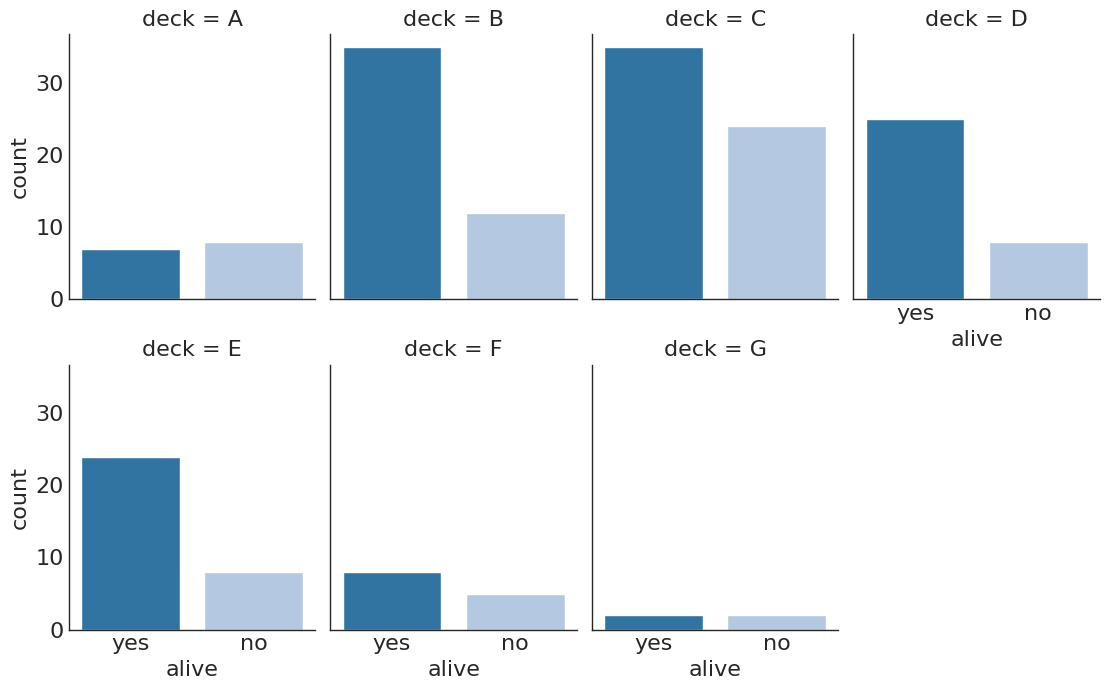

In [54]:
g = sns.catplot(x = 'alive', col = 'deck', col_wrap = 4,
                data = df,
                kind = 'count', height = 3.5, aspect = .8,
                palette = 'tab20')

fig.suptitle('sf')
plt.show()

#Composition

In [55]:
#Pie Chart
#파이 차트

In [56]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')
df = df.groupby('class').size()

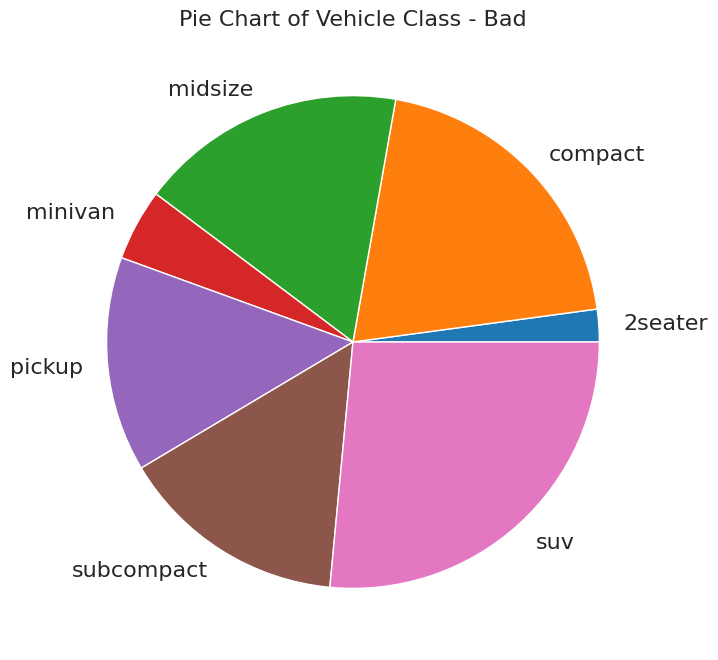

In [57]:
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Pie Chart of Vehicle Class - Bad')
plt.ylabel('')
plt.show()

In [58]:
#Tree Map
#Decision Tree가 Split한 모형처럼 표현

In [59]:
!pip install squarify

In [60]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv')
df = df.groupby('class').size().reset_index(name='counts')

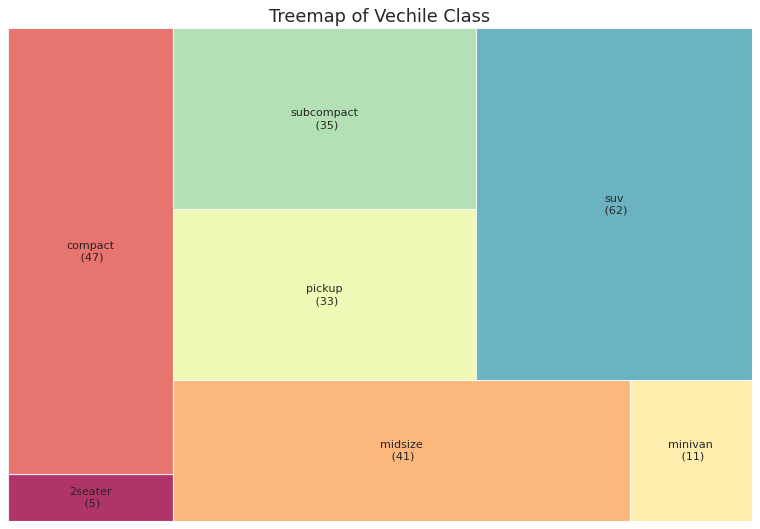

In [61]:
import squarify

labels = df.apply(lambda x: str(x[0]) + '\n (' + str(x[1]) + ')', axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)


plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

#Change

In [62]:
#Time Series Plot
#시간에 따른 plot

In [63]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


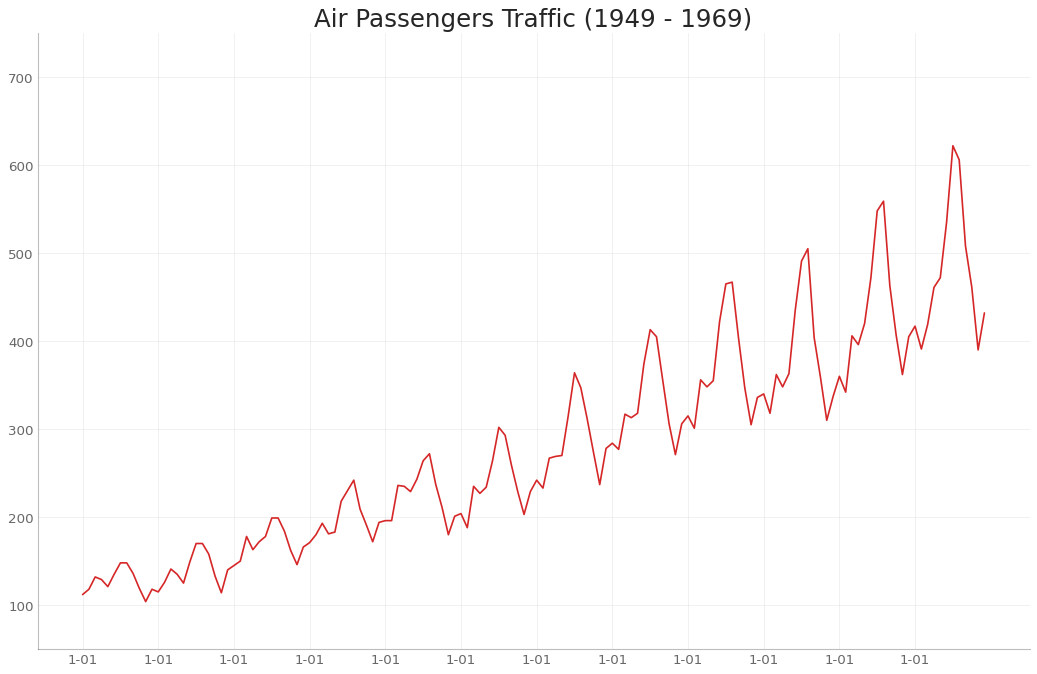

In [64]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'value', data=df, color='tab:red')


plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title('Air Passengers Traffic (1949 - 1969)', fontsize=22)
plt.grid(axis='both', alpha=.3)


plt.gca().spines['top'].set_alpha(0.0)
plt.gca().spines['bottom'].set_alpha(0.3)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(0.3)
plt.show()

In [65]:
#Time Series Decomposition Plot
#시계열 데이터 분해를 통한 규칙성 파악

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

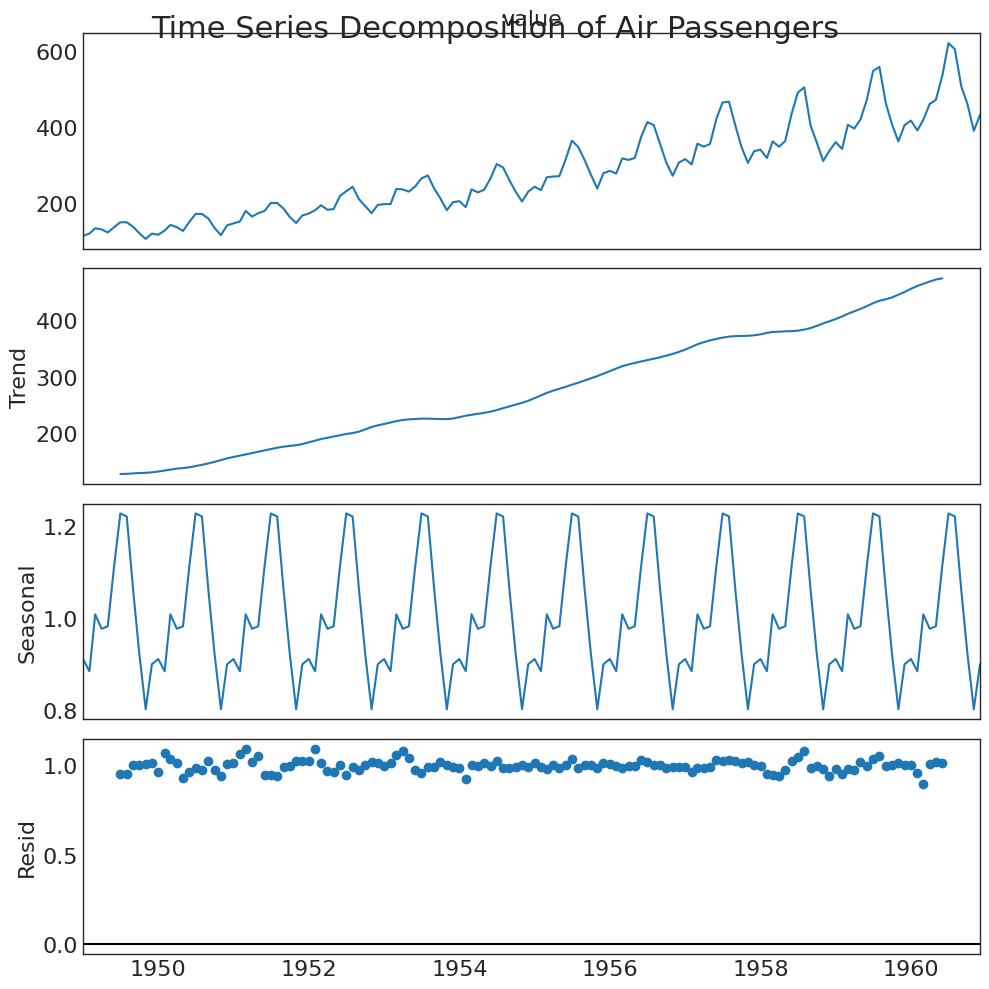

In [67]:
result = seasonal_decompose(df['value'], model='multiplicative')

plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

In [68]:
#Time Series with Error Bands
#오차화 함께 표현하는 시계열 Plot

In [69]:
from dateutil.parser import parse
from scipy.stats import sem

df_raw = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/orders_45d.csv',
                     parse_dates=['purchase_time', 'purchase_date'])

df_mean = df_raw.groupby('purchase_date').quantity.mean()
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)

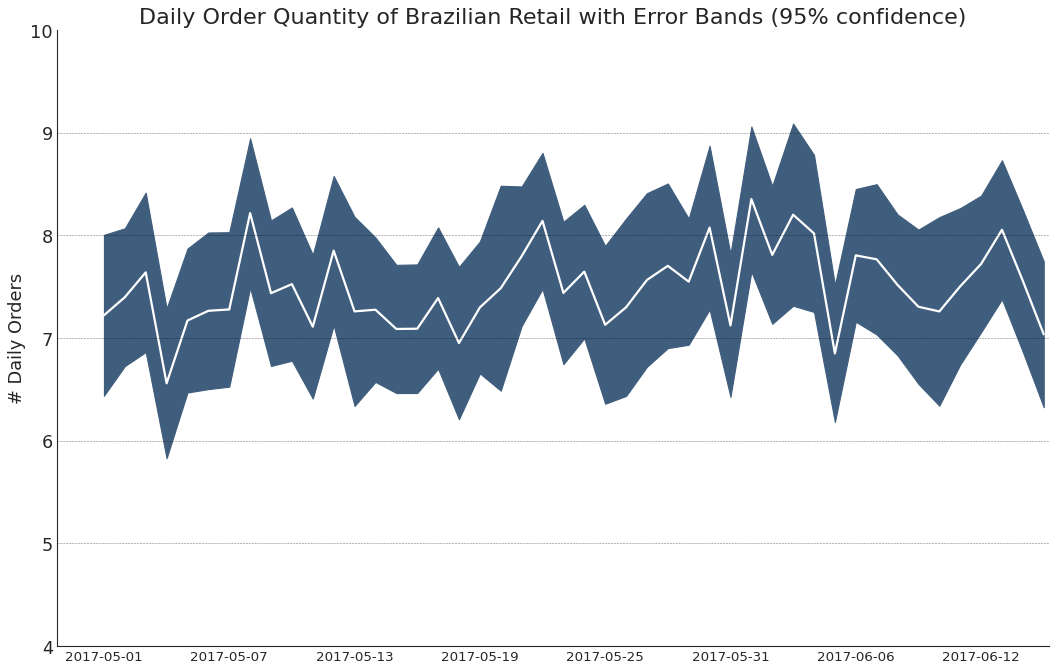

In [70]:
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel('# Daily Orders', fontsize=16)
x = [d.date().strftime('%Y-%m-%d') for d in df_mean.index]
plt.plot(x, df_mean, color = 'white', lw = 2)
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color = '#3F5D7D')


plt.gca().spines['top'].set_alpha(0)
plt.gca().spines['bottom'].set_alpha(1)
plt.gca().spines['right'].set_alpha(0)
plt.gca().spines['left'].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]] , fontsize=12)
plt.title('Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)', fontsize=20)

s, e = plt.gca().get_xlim()
plt.xlim(s, e-2)
plt.ylim(4, 10)

for y in range(5, 10, 1):
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

In [71]:
#Calendar Heat Map
#날짜에 맞춰 히트맵으로 데이터 표시
!pip install calmap

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv', parse_dates=['date'])# 야후 주가
df.set_index('date', inplace=True)

In [73]:
df.head()

,VIX.Open,VIX.High,VIX.Low,VIX.Close,VIX.Volume,VIX.Adjusted,year,month,monthf,weekday,weekdayf,week
date,,,,,,,,,,,,
2007-01-03,12.16,12.75,11.53,12.04,0,12.04,2007,1,Jan,3,Wed,1
2007-01-04,12.40,12.42,11.28,11.51,0,11.51,2007,1,Jan,4,Thu,1
2007-01-05,11.84,12.25,11.68,12.14,0,12.14,2007,1,Jan,5,Fri,1
2007-01-08,12.48,12.83,11.78,12.00,0,12.00,2007,1,Jan,1,Mon,2
2007-01-09,11.86,12.47,11.69,11.91,0,11.91,2007,1,Jan,2,Tue,2


In [74]:
df[df['year'] == 2014]

,VIX.Open,VIX.High,VIX.Low,VIX.Close,VIX.Volume,VIX.Adjusted,year,month,monthf,weekday,weekdayf,week
date,,,,,,,,,,,,
2014-01-02,14.320000,14.590000,14.00,14.230000,0,14.230000,2014,1,Jan,4,Thu,0
2014-01-03,14.060000,14.220000,13.57,13.760000,0,13.760000,2014,1,Jan,5,Fri,0
2014-01-06,13.410000,14.000000,13.22,13.550000,0,13.550000,2014,1,Jan,1,Mon,1
2014-01-07,12.380000,13.280000,12.16,12.920000,0,12.920000,2014,1,Jan,2,Tue,1
2014-01-08,13.040000,13.240000,12.86,12.870000,0,12.870000,2014,1,Jan,3,Wed,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,14.520000,14.540000,14.01,14.370000,0,14.370000,2014,12,Dec,3,Wed,51
2014-12-26,14.600000,14.840000,14.13,14.500000,0,14.500000,2014,12,Dec,5,Fri,51
2014-12-29,16.040001,16.139999,15.06,15.060000,0,15.060000,2014,12,Dec,1,Mon,52


<Figure size 1280x800 with 0 Axes>

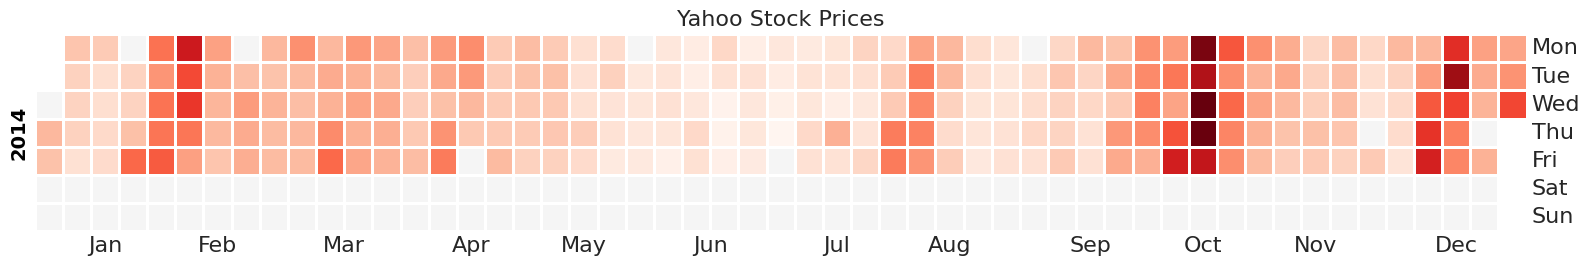

In [75]:
import calmap

plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df[df['year'] == 2014]['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
plt.show()

#Groups

In [76]:
#Dendrogram

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

In [78]:
df.head()

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


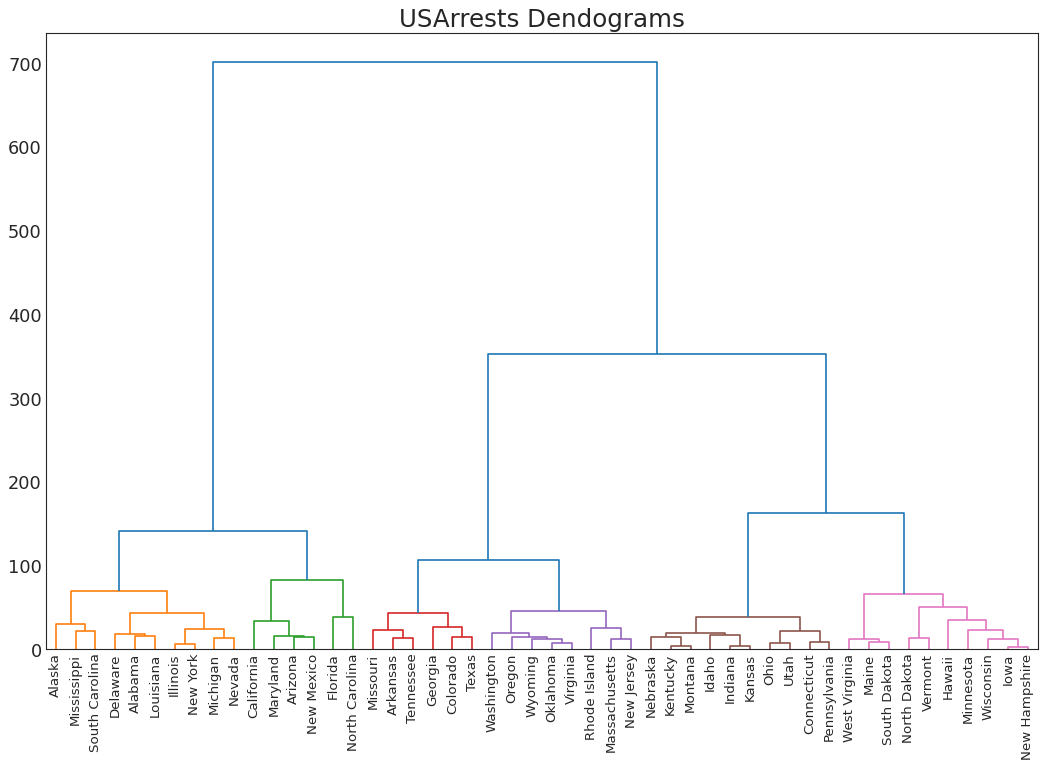

In [79]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16, 10), dpi= 80)
plt.title('USArrests Dendograms', fontsize=22)
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)
plt.xticks(fontsize=12)
plt.show()

In [80]:
#Cluster plot
#클러스터링을 통한 가까운 데이터들 그룹화

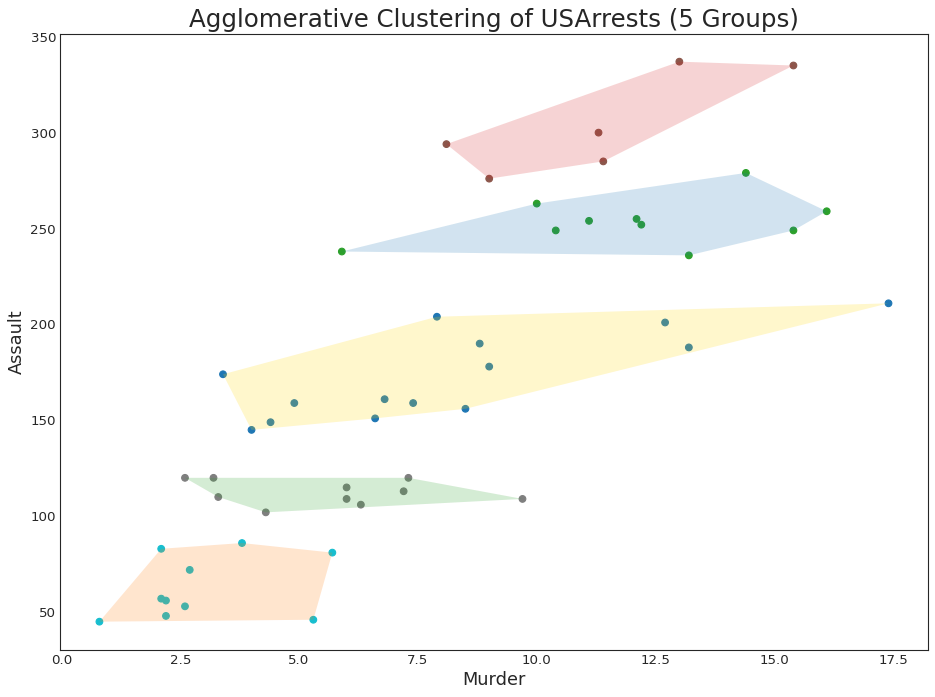

In [81]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])


plt.figure(figsize=(14, 10), dpi= 80)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')


def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)


encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc='gold', alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc='tab:blue', alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc='tab:red', alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc='tab:green', alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc='tab:orange', alpha=0.2, linewidth=0)


plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

In [82]:
#Andrews Curve
#데이터 내의 클러스터를 잠재적으로 식별하기 위해 다변량 데이터를 시각화하는 방법

In [83]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')
df.drop(['cars', 'carname'], axis=1, inplace=True)

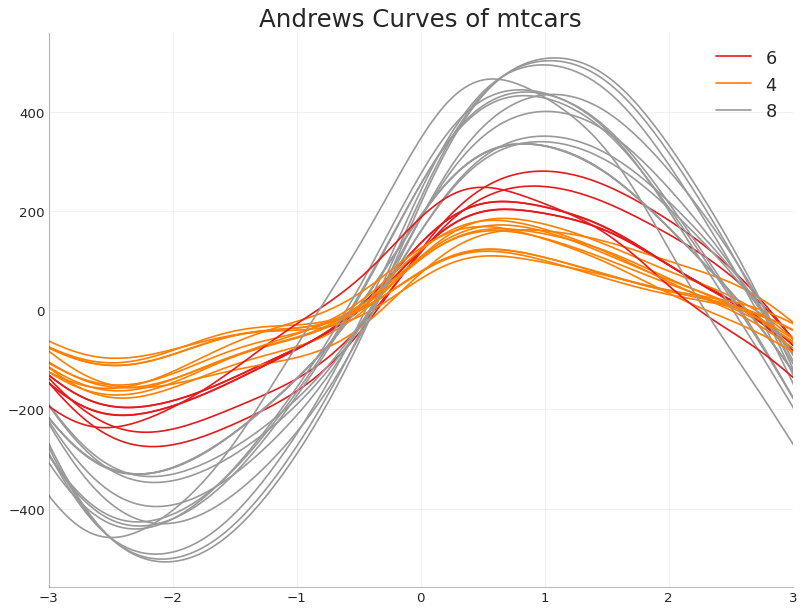

In [84]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(df, 'cyl', colormap='Set1')# cyl:몇 기통


plt.gca().spines['top'].set_alpha(0)
plt.gca().spines['bottom'].set_alpha(.3)
plt.gca().spines['right'].set_alpha(0)
plt.gca().spines['left'].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()